In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [254]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [255]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [257]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


***Preprocessing***

In [258]:
df.isnull().sum().sum()

np.int64(0)

***Exploratory Data analysis***

Text(0, 0.5, 'Count')

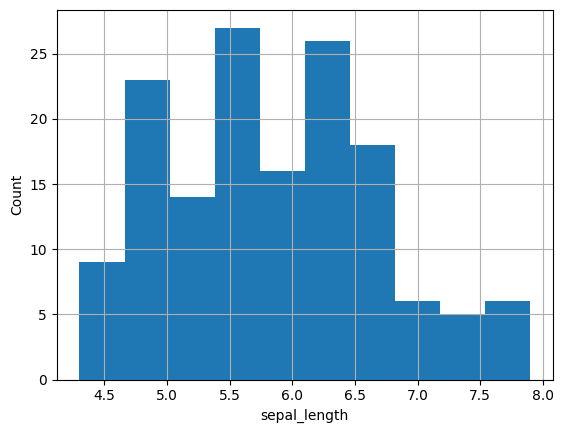

In [259]:
df['sepal_length'].hist()
plt.xlabel("sepal_length")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

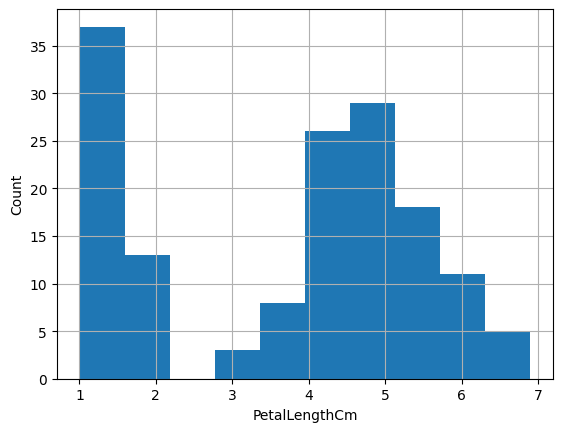

In [260]:
df['petal_length'].hist()
plt.xlabel("PetalLengthCm")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

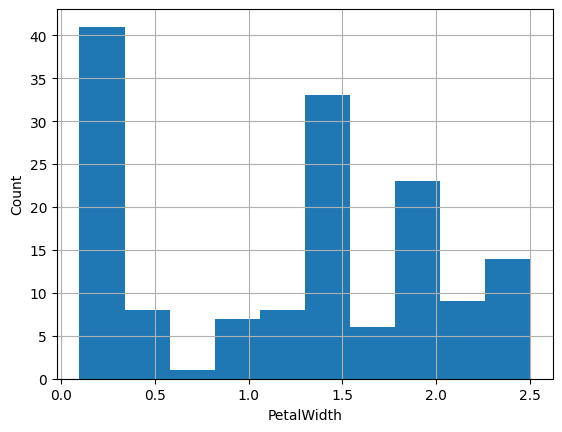

In [261]:
df['petal_width'].hist()
plt.xlabel("PetalWidth")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

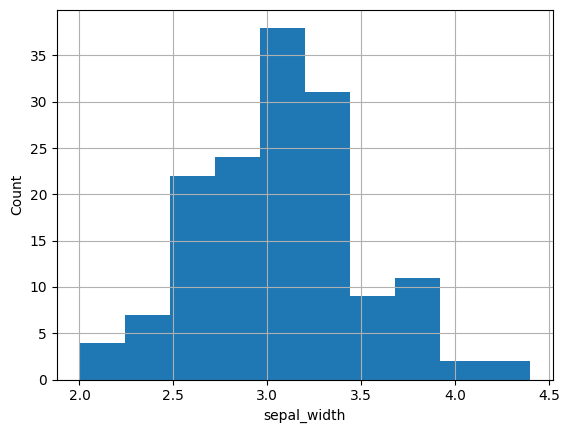

In [262]:
df['sepal_width'].hist()
plt.xlabel("sepal_width")
plt.ylabel("Count")

In [263]:
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-virginica','Iris-versicolor']

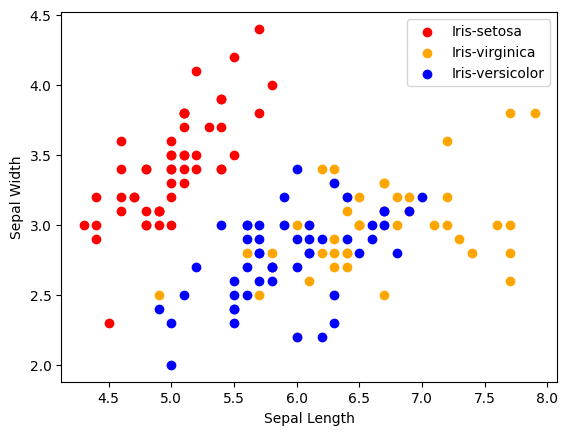

In [264]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c = colors[i],label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

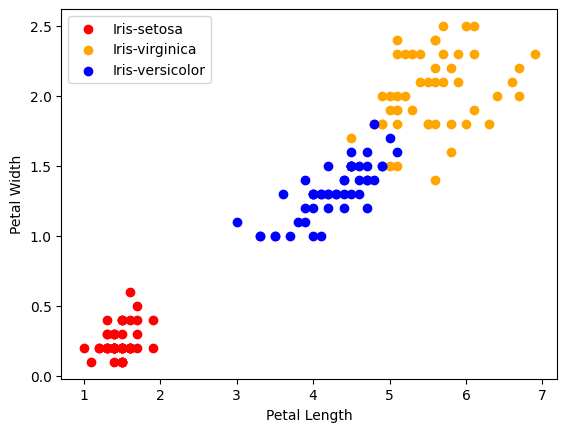

In [265]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c = colors[i],label=species[i])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

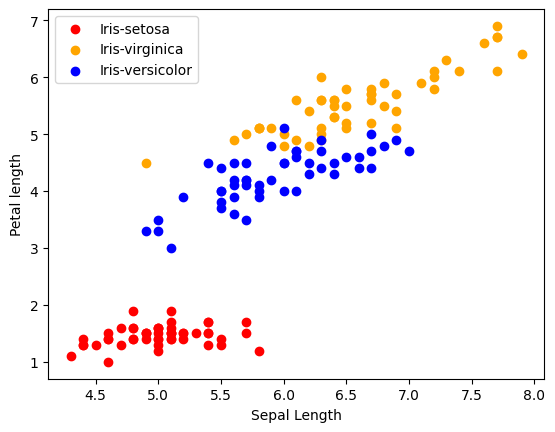

In [266]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c = colors[i],label=species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal length')
plt.legend()

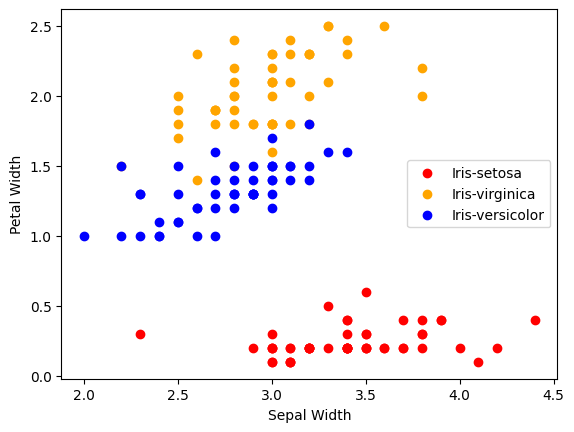

In [267]:
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c = colors[i],label=species[i])

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

Correlation Matrix

In [268]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix on numeric columns only
correlation_matrix = numeric_df.corr()

print(correlation_matrix)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

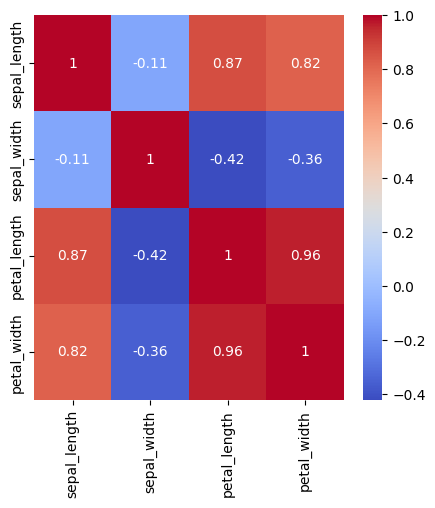

In [269]:
corr = correlation_matrix
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax = ax,cmap ='coolwarm')

Strong correlations mean features are related, and you might want to reduce redundancy.

Negative correlations are still important, showing inverse relationships.

Multicollinearity can cause issues in modeling, so it's a good practice to remove highly correlated variables or apply dimensionality reduction.

***Removing petal Length and petal width by combining them using PCA***

In [270]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [271]:
petal_features = df[['petal_length', 'petal_width']]

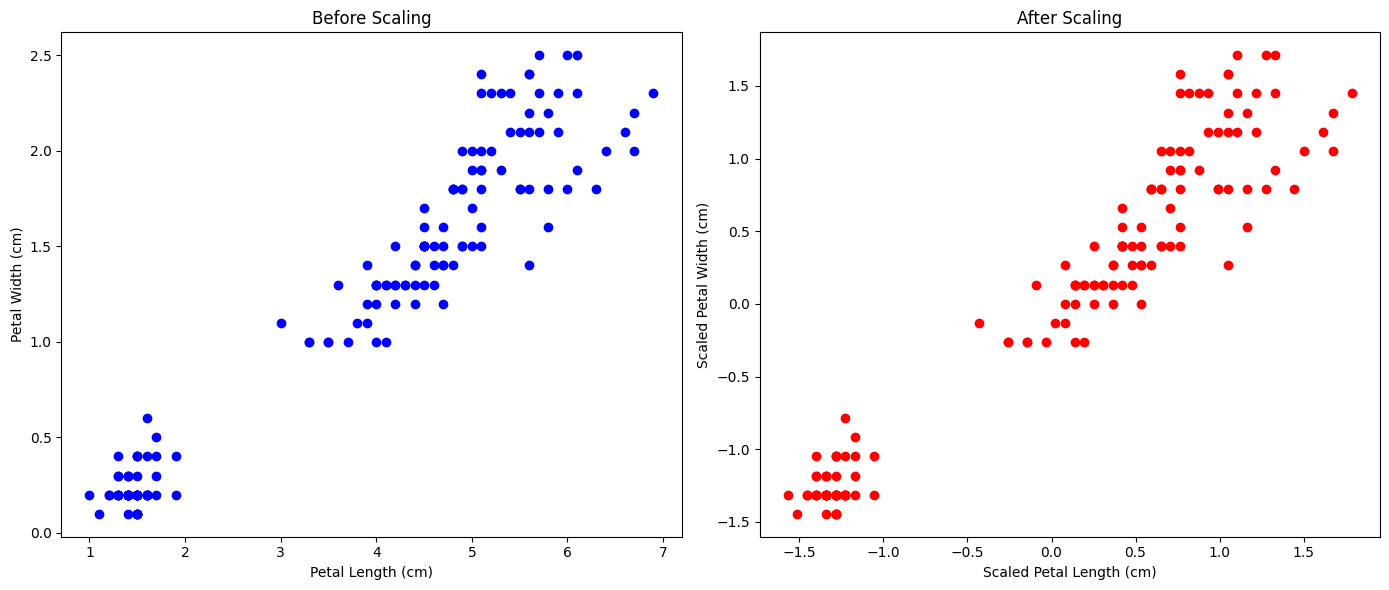

In [272]:
plt.figure(figsize=(14, 6))

# Plot before scaling
plt.subplot(1, 2, 1)
plt.scatter(petal_features['petal_length'], petal_features['petal_width'], color='blue')
plt.title("Before Scaling")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(petal_features)

# Plot after scaling
plt.subplot(1, 2, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], color='red')
plt.title("After Scaling")
plt.xlabel("Scaled Petal Length (cm)")
plt.ylabel("Scaled Petal Width (cm)")

# Show the plot
plt.tight_layout()

plt.show()

In [273]:
pca = PCA(n_components=1)
principal_components = pca.fit_transform(scaled_data)

In [274]:
df['PCA_Combined'] = principal_components
df = df.drop(columns=['petal_length', 'petal_width'])

Text(0, 0.5, 'Count')

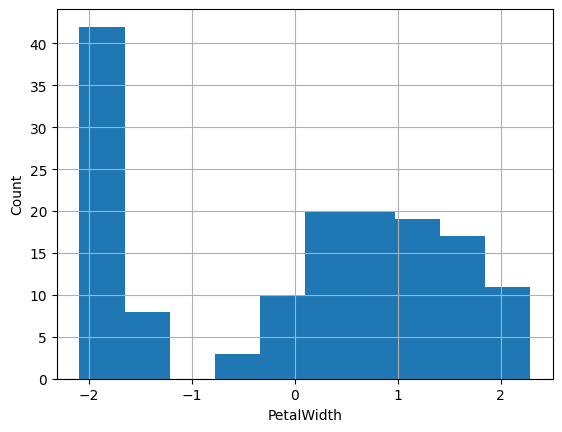

In [287]:
df['PCA_Combined'].hist()
plt.xlabel("PetalWidth")
plt.ylabel("Count")

***Label Encoder***

In [275]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [276]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,species,PCA_Combined
0,5.1,3.5,0,-1.876838
1,4.9,3.0,0,-1.876838
2,4.7,3.2,0,-1.917048
3,4.6,3.1,0,-1.836627
4,5.0,3.6,0,-1.876838


**Model Training**

In [302]:
from sklearn.model_selection import train_test_split

x= df.drop(columns=['species'])
y = df['species']
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [303]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [304]:
print("Accuracy = ",model.score(X_test,Y_test))

Accuracy =  1.0


In [305]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [306]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [307]:
print("Accuracy = ",model.score(X_test,Y_test))

Accuracy =  1.0


In [308]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [309]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [310]:
print("Accuracy = ",model.score(X_train,Y_train))

Accuracy =  1.0


In [311]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,Y_train)

SVC()

In [312]:
print("Accuracy = ",model.score(X_test,Y_test))

Accuracy =  1.0
